In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df1 = pd.read_csv("TASK2_dataset.csv")

In [234]:
df1

song_id keyword_1  keyword_2  keyword_3      genre
0         74    guitar      happy  distorted       rock
1        103     brass  energetic    melodic  classical
2        201     banjo      happy   acoustic    country
3        194     synth  energetic      heavy    hip-hop
4        184     synth  energetic       slow    hip-hop
..       ...       ...        ...        ...        ...
142      195     synth      angry    melodic    hip-hop
143        7    guitar  energetic       fast        pop
144       14    guitar      happy   rhythmic        pop
145       36     synth     mellow  danceable        pop
146       29     synth  emotional       slow        pop

[147 rows x 5 columns]

In [235]:
print(df1.isnull().any()) #checking for null values

song_id      False
keyword_1    False
keyword_2    False
keyword_3    False
genre        False
dtype: bool


In [236]:
genre_counts = df1["genre"].value_counts()

keywords = pd.concat([df1["keyword_1"], df1["keyword_2"], df1["keyword_3"]])
keyword_counts = keywords.value_counts()

keyword_genre_counts = df1.melt(id_vars=["genre"], value_vars=["keyword_1", "keyword_2", "keyword_3"]) #analysing keyword genre relationship
keyword_genre_summary = keyword_genre_counts.groupby(["genre", "value"]).size().unstack(fill_value=0)

genre_counts, keyword_counts.head(10), keyword_genre_summary.head()

(genre
 pop          31
 rock         30
 hip-hop      30
 country      29
 classical    27
 Name: count, dtype: int64,
 guitar       65
 synth        43
 happy        30
 fast         28
 mellow       28
 energetic    27
 melodic      27
 upbeat       24
 slow         23
 sad          21
 Name: count, dtype: int64,
 value      acoustic  angry  banjo  brass  calm  danceable  distorted  \
 genre                                                                  
 classical         0      0      0     11     7          0          0   
 country           4      0      6      0     0          0          0   
 hip-hop           0      6      0      0     0          0          0   
 pop               0      0      0      0     4          5          0   
 rock              5      6      0      0     0          0          5   
 
 value      emotional  energetic  fast  ...  melodic  nostalgic  piano  \
 genre                                  ...                              
 classical          0

In [237]:
d1 = pd.DataFrame(genre_counts)

In [238]:
d1 # analysing how many songs have a particular genre

count
genre           
pop           31
rock          30
hip-hop       30
country       29
classical     27

we see that pop has the highest amount of songs(31) followed by both rock(30) and hip-hop(30) and then country and classical

In [239]:
d2=pd.DataFrame(keywords)

In [240]:
d2

0
0       guitar
1        brass
2        banjo
3        synth
4        synth
..         ...
142    melodic
143       fast
144   rhythmic
145  danceable
146       slow

[441 rows x 1 columns]

In [241]:
d3=pd.DataFrame(keyword_genre_counts)

In [242]:
d3

genre   variable      value
0         rock  keyword_1     guitar
1    classical  keyword_1      brass
2      country  keyword_1      banjo
3      hip-hop  keyword_1      synth
4      hip-hop  keyword_1      synth
..         ...        ...        ...
436    hip-hop  keyword_3    melodic
437        pop  keyword_3       fast
438        pop  keyword_3   rhythmic
439        pop  keyword_3  danceable
440        pop  keyword_3       slow

[441 rows x 3 columns]

using tf-idf would be better because it is more accurate and TF-IDF improves upon BoW by weighing the importance of words not just by their frequency in a document but also by how common or rare they are across the entire corpus. This method emphasizes unique terms while downplaying common ones.It performs better than the BoW model as it considers the importance of the word in a document into consideration.

In [243]:
l1=df1["keyword_1"].to_list()

In [244]:
l2=df1["keyword_2"].to_list()

In [245]:
l3=df1["keyword_3"].to_list()

In [246]:
def compute_tf(l):
    tf_dict = {}
    total_words = len(l)
    
    for word in l:
        if word in tf_dict:
            tf_dict[word] += 1
        else:
            tf_dict[word] = 1
    for word in tf_dict:
        tf_dict[word] /= total_words
    
    return tf_dict

In [247]:
tf1=compute_tf(l1)
compute_tf(l1)

{'guitar': 0.4421768707482993,
 'brass': 0.07482993197278912,
 'banjo': 0.04081632653061224,
 'synth': 0.2925170068027211,
 'violin': 0.06802721088435375,
 'piano': 0.08163265306122448}

In [248]:
tf2=compute_tf(l2)

In [249]:
tf3=compute_tf(l3)

finding idf(inverse document frequency) values

In [250]:
import math
def computeidf(l1,l2,l3):
    l=[l1,l2,l3]
    idf={}
    for i in range(len(l1)):
        cnt=0
        y=l1[i]
        for j in l:
            if j.count(y)>=1:
                cnt+=1
        idf[y]=math.log(3/cnt)
    return idf


In [251]:
idf1=computeidf(l1,l2,l3)
idf1

{'guitar': 1.0986122886681098,
 'brass': 1.0986122886681098,
 'banjo': 1.0986122886681098,
 'synth': 1.0986122886681098,
 'violin': 1.0986122886681098,
 'piano': 1.0986122886681098}

In [252]:
idf2=computeidf(l2,l3,l1)
idf2

{'happy': 1.0986122886681098,
 'energetic': 1.0986122886681098,
 'calm': 1.0986122886681098,
 'mellow': 1.0986122886681098,
 'emotional': 1.0986122886681098,
 'nostalgic': 1.0986122886681098,
 'angry': 1.0986122886681098,
 'sad': 1.0986122886681098,
 'upbeat': 0.4054651081081644}

In [253]:
idf3=computeidf(l3,l1,l2)
idf3

{'distorted': 1.0986122886681098,
 'melodic': 1.0986122886681098,
 'acoustic': 1.0986122886681098,
 'heavy': 1.0986122886681098,
 'slow': 1.0986122886681098,
 'upbeat': 0.4054651081081644,
 'rhythmic': 1.0986122886681098,
 'twangy': 1.0986122886681098,
 'fast': 1.0986122886681098,
 'danceable': 1.0986122886681098}

In [254]:
def computetfidf(tf,idf,l):
    tfidf={}
    for i in l:
        tfidf[i]=tf[i]*idf[i]
    return tfidf
        
    

In [255]:
tfidf1=computetfidf(tf1,idf1,l1)
tfidf1

{'guitar': 0.4857809439688921,
 'brass': 0.08220908282550482,
 'banjo': 0.04484131790482081,
 'synth': 0.32136277831788246,
 'violin': 0.07473552984136803,
 'piano': 0.08968263580964161}

In [256]:
tfidf2=computetfidf(tf2,idf2,l2)
tfidf2

{'happy': 0.22420658952410405,
 'energetic': 0.20178593057169364,
 'calm': 0.08220908282550482,
 'mellow': 0.20925948355583043,
 'emotional': 0.08220908282550482,
 'nostalgic': 0.022420658952410404,
 'angry': 0.08968263580964161,
 'sad': 0.15694461266687282,
 'upbeat': 0.011033064166208554}

In [257]:
tfidf3=computetfidf(tf3,idf3,l3)
tfidf3

{'distorted': 0.03736776492068401,
 'melodic': 0.20178593057169364,
 'acoustic': 0.0672619768572312,
 'heavy': 0.07473552984136803,
 'slow': 0.17189171863514643,
 'upbeat': 0.05516532083104278,
 'rhythmic': 0.10462974177791522,
 'twangy': 0.04484131790482081,
 'fast': 0.20925948355583043,
 'danceable': 0.03736776492068401}

doing PCA analysis for dimensionality reduction

In [258]:
def pca_numpy(X, n_components=2):
    # Standardize Data (Zero Mean)
    X_meaned = X - np.mean(X)

    # Compute Covariance Matrix
    covariance_matrix = np.cov(X_meaned, rowvar=False)

    # Compute Eigenvalues & Eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort Eigenvectors by Largest Eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Descending order
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select Top n_components
    selected_eigenvectors = eigenvectors[:, :n_components]
    
    # Transform Data
    X_reduced = np.dot(X_meaned, selected_eigenvectors)

    # Explained variance ratio
    explained_variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)
    
    return X_reduced, explained_variance_ratio

In [259]:
y=df1.copy()

In [260]:
zero=np.zeros((3,147)).tolist()

In [261]:
for j in range(0,146):
    zero[0][j]=tfidf1[l1[j]]
    zero[1][j]=tfidf2[l2[j]]
    zero[2][j]=tfidf3[l3[j]]

In [262]:
zero[0][146]=tfidf1[l1[146]]
zero[1][146]=tfidf2[l2[146]]
zero[2][146]=tfidf3[l3[146]]

In [263]:
zero=np.array(zero)

In [264]:
zero

array([[0.48578094, 0.08220908, 0.04484132, 0.32136278, 0.32136278,
        0.08220908, 0.48578094, 0.48578094, 0.07473553, 0.48578094,
        0.08968264, 0.07473553, 0.48578094, 0.08220908, 0.48578094,
        0.48578094, 0.08220908, 0.48578094, 0.48578094, 0.32136278,
        0.48578094, 0.48578094, 0.32136278, 0.32136278, 0.48578094,
        0.48578094, 0.48578094, 0.48578094, 0.32136278, 0.48578094,
        0.48578094, 0.48578094, 0.08968264, 0.07473553, 0.07473553,
        0.48578094, 0.32136278, 0.04484132, 0.32136278, 0.48578094,
        0.48578094, 0.08968264, 0.32136278, 0.48578094, 0.07473553,
        0.48578094, 0.04484132, 0.32136278, 0.48578094, 0.48578094,
        0.08220908, 0.08220908, 0.48578094, 0.32136278, 0.48578094,
        0.48578094, 0.32136278, 0.32136278, 0.32136278, 0.04484132,
        0.48578094, 0.48578094, 0.32136278, 0.48578094, 0.32136278,
        0.32136278, 0.32136278, 0.48578094, 0.48578094, 0.08968264,
        0.48578094, 0.32136278, 0.08968264, 0.07

In [265]:
zero

array([[0.48578094, 0.08220908, 0.04484132, 0.32136278, 0.32136278,
        0.08220908, 0.48578094, 0.48578094, 0.07473553, 0.48578094,
        0.08968264, 0.07473553, 0.48578094, 0.08220908, 0.48578094,
        0.48578094, 0.08220908, 0.48578094, 0.48578094, 0.32136278,
        0.48578094, 0.48578094, 0.32136278, 0.32136278, 0.48578094,
        0.48578094, 0.48578094, 0.48578094, 0.32136278, 0.48578094,
        0.48578094, 0.48578094, 0.08968264, 0.07473553, 0.07473553,
        0.48578094, 0.32136278, 0.04484132, 0.32136278, 0.48578094,
        0.48578094, 0.08968264, 0.32136278, 0.48578094, 0.07473553,
        0.48578094, 0.04484132, 0.32136278, 0.48578094, 0.48578094,
        0.08220908, 0.08220908, 0.48578094, 0.32136278, 0.48578094,
        0.48578094, 0.32136278, 0.32136278, 0.32136278, 0.04484132,
        0.48578094, 0.48578094, 0.32136278, 0.48578094, 0.32136278,
        0.32136278, 0.32136278, 0.48578094, 0.48578094, 0.08968264,
        0.48578094, 0.32136278, 0.08968264, 0.07

In [266]:
pcaarr1,arr=pca_numpy(zero.T)

In [267]:
pcaarr1

array([[-2.91354693e-01,  1.43634733e-01],
       [ 1.26458835e-01,  1.86952559e-02],
       [ 1.50280648e-01,  1.57931933e-01],
       [-1.23602697e-01,  1.18740928e-01],
       [-1.14371962e-01,  2.42464527e-02],
       [ 1.15638896e-01,  1.36112116e-01],
       [-2.75150252e-01, -2.10015388e-02],
       [-2.87804410e-01,  1.07290703e-01],
       [ 1.33701642e-01,  2.10045628e-02],
       [-2.75150252e-01, -2.10015388e-02],
       [ 1.12901268e-01,  8.72677082e-02],
       [ 1.34166188e-01,  2.33187075e-02],
       [-2.85395881e-01,  9.38630372e-02],
       [ 1.23035414e-01,  5.24930225e-02],
       [-2.89663760e-01,  1.26324763e-01],
       [-2.89274964e-01,  1.23176400e-01],
       [ 1.26974494e-01,  1.30006312e-02],
       [-2.81270615e-01,  4.83060394e-02],
       [-2.89663760e-01,  1.26324763e-01],
       [-1.11455987e-01,  6.33736258e-04],
       [-2.90061441e-01,  1.31643383e-01],
       [-2.86764881e-01,  1.00391879e-01],
       [-1.11404874e-01, -7.37503315e-03],
       [-1.

I used PCA for dimensionality reduction because it is Fast (linear algebra-based) and requires less computational power

combined embeddings(method used basically applying PCA again and putting n=1 this time for creating a single embedding) after taking transpose

In [268]:
pcaarr2=pca_numpy(pcaarr1,1)[0]

In [269]:
pcaarr2 #combined embeddings

array([[ 0.25490886],
       [-0.16290467],
       [-0.18672648],
       [ 0.08715686],
       [ 0.07792612],
       [-0.15208473],
       [ 0.23870442],
       [ 0.25135857],
       [-0.17014748],
       [ 0.23870442],
       [-0.1493471 ],
       [-0.17061202],
       [ 0.24895004],
       [-0.15948125],
       [ 0.25321792],
       [ 0.25282913],
       [-0.16342033],
       [ 0.24482478],
       [ 0.25321792],
       [ 0.07501015],
       [ 0.2536156 ],
       [ 0.25031904],
       [ 0.07495904],
       [ 0.08901621],
       [ 0.23303259],
       [ 0.2478594 ],
       [ 0.23928761],
       [ 0.23799436],
       [ 0.07437584],
       [ 0.25148543],
       [ 0.25432566],
       [ 0.25282913],
       [-0.15379363],
       [-0.15621717],
       [-0.17416231],
       [ 0.25140969],
       [ 0.08489983],
       [-0.18828988],
       [ 0.07457024],
       [ 0.24297338],
       [ 0.23889881],
       [-0.15527307],
       [ 0.08315024],
       [ 0.23687908],
       [-0.16750165],
       [ 0

k means clustering

In [270]:
def kmeans(data, k, max_iters=30000, tol=1e-4):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for i in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids

k = 4
labels, centroids = kmeans(pcaarr1, k)

In [271]:
def silhouette_score(X, labels):
    from collections import defaultdict

    clusters = defaultdict(list)
    for i, label in enumerate(labels):
        clusters[label].append(i)

    def intra_cluster_distance(i, cluster):
        if len(cluster) <= 1:
            return 0
        return np.mean([np.linalg.norm(X[i] - X[j]) for j in cluster if i != j])

    def nearest_cluster_distance(i, label):
        other_clusters = [cl for cl in clusters if cl != label]
        if not other_clusters:
            return 0
        return min(
            np.mean([np.linalg.norm(X[i] - X[j]) for j in clusters[cl]]) for cl in other_clusters
        )

    scores = []
    for i, label in enumerate(labels):
        a = intra_cluster_distance(i, clusters[label])
        b = nearest_cluster_distance(i, label)
        score = (b - a) / max(a, b) if max(a, b) > 0 else 0
        scores.append(score)

    return np.mean(scores)

Silhouette Score: 0.7098


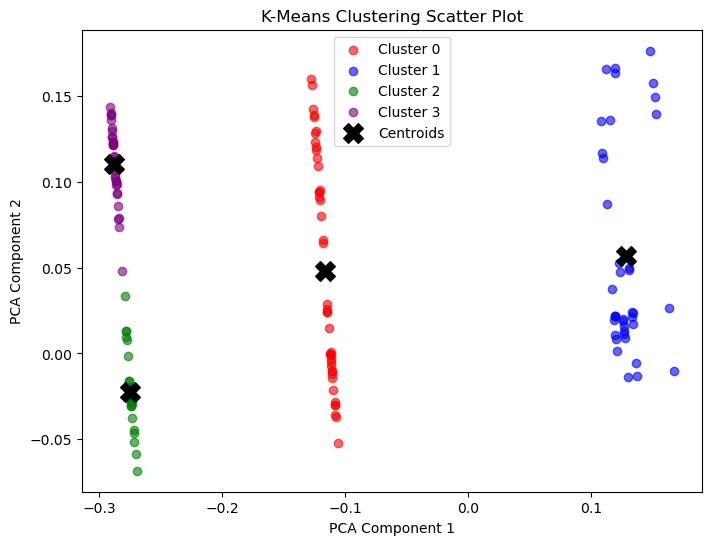

In [272]:
k = 4
labels, centroids = kmeans(pcaarr1, k)

silhouette = silhouette_score(pcaarr1, labels)
print(f"Silhouette Score: {silhouette:.4f}")

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple']
for cluster_id in range(k):
    cluster_points = pcaarr1[labels == cluster_id] 
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], 
            color='black', marker='X', s=200, label='Centroids')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Scatter Plot")
plt.legend()
plt.show()


In [276]:
labels, centroids = kmeans(pcaarr1, k)
genres=df1['genre']
cluster_df = pd.DataFrame({"Cluster": labels, "Genre": genres})
cluster_genre_distribution = cluster_df.groupby("Cluster")["Genre"].value_counts(normalize=True) * 100
cluster_genre_distribution = cluster_genre_distribution.unstack().fillna(0)

print(cluster_genre_distribution)


Genre    classical    country    hip-hop        pop       rock
Cluster                                                       
0        41.666667  33.333333   0.000000  25.000000   0.000000
1        83.333333  16.666667   0.000000   0.000000   0.000000
2        80.000000   0.000000   0.000000  20.000000   0.000000
3         0.000000  21.296296  27.777778  23.148148  27.777778
